# AHJIN STUDIOS: Box Office Success Blueprint

## Project Overview

Ahjin Studios is taking a bold leap into the world of original video content. With major players in the industry producing record-breaking films, it's time we carve our own path to the silver screen. But before the cameras roll, we need to ground our creativity in strategy. This project explores which types of films are dominating the box office - genres, themes, release seasons, production budgets, and more - to identify what’s *actually working* in today’s film market.

## Business Problem

The entertainment industry is undergoing a massive transformation. Streaming giants and traditional studios alike are pouring billions into original content, resulting in a saturated, competitive, and fast-evolving market. Ahjin Studios, a newcomer in this arena, wants to make a strong, strategic entrance. But without prior experience in filmmaking or content production, the studio lacks a grounded understanding of what drives box office success.

While creativity is the soul of cinema, data is its compass. The financial risk of producing a film is substantial, with production budgets often ranging from millions to hundreds of millions of dollars — and no guaranteed return. Choosing the wrong genre, misreading audience interests, or releasing at the wrong time can spell disaster. Conversely, aligning a film's concept with market demand can lead to runaway hits, brand recognition, and long-term profitability.

Ahjin Studios needs clear, evidence-based insights to answer critical questions:

- What types of movies are **worth betting on**?
- Where can we find the **sweet spot between budget and revenue**?
- Which trends are **passing fads**, and which are **sustainable opportunities**?
- How can a **new studio** stand out in a market dominated by legacy franchises and big-name talent?

By conducting a comprehensive analysis of recent box office performance, this project aims to **remove the guesswork** from movie production decisions and provide Ahjin Studios with a **strategic blueprint** for launching commercially viable, audience-ready films that can hold their own in today’s high-stakes entertainment landscape.

## Objective

To analyze recent box office trends and translate key findings into **actionable, data-driven recommendations** that will guide Ahjin Studios in developing high-performing original films.

## Key Questions

- Which **genres** are consistently earning the highest revenue?
- What **budget range** yields the best ROI?
- How do **release dates** affect performance?
- Do **star power** and **director reputation** play a measurable role?
- Are **franchise films** outperforming standalones?
- What **audience demographics** are driving ticket sales?

## Deliverables

- A clean and exploratory dataset analysis of recent box office films
- Visual breakdowns of top-performing genres, budgets, and seasons
- A concise summary report with **strategic recommendations** for Ahjin Studios

## Final Goal

To provide the leadership team at Ahjin Studios with a **clear roadmap for movie production** - one that maximizes commercial success while carving out a unique space in the entertainment industry.

> Lights, camera... data! Let's get to work.

## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story- but before we dive into any narratives, we'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise us later if we don’t pay attention now.

#### What's happening:
- Importing key libraries like 'pandas', 'numpy', 'seaborn' and 'matplotlib'- the usual suspects for slicing, dicing and visualizing data and 'sql' for database manipulation.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.
- Get metadata
- Get basic statistics information of both numerica and categorical columns

This is where trust is built- between us and the dataset.

Exploration done right is part instinct, part structure- this is BOTH!

In [740]:
# Mathematical computation and data manipulation libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Calendar for time series
import calendar

# SQLite3 module for database manipulation
import sqlite3

# Ignore pesky warnings
import warnings
warnings.filterwarnings("ignore")

### 1. BUDGET DATASET

In [741]:
# Load the dataset
budget_df = pd.read_csv(r'..\Raw_Data\tn.movie_budgets.csv', encoding = 'Latin1')
budget_df.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [742]:
# Display the shape
print(f"The dataset has {budget_df.shape[0]} rows and {budget_df.shape[1]} columns.")

The dataset has 5782 rows and 6 columns.


In [743]:
# Display column names
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [744]:
# Get metadata
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [745]:
# Display descriptive statistics for categorical columns
budget_df.describe(include = 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,King Kong,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


In [746]:
# Check for duplicates and null values
print("Duplicates:", budget_df.duplicated().sum())
print("\nNull Values:\n", budget_df.isna().sum())

Duplicates: 0

Null Values:
 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### 2. GROSS DATASET

In [747]:
# Load gross dataset
gross_df = pd.read_csv(r'..\Raw_Data\bom.movie_gross.csv')
gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [748]:
# Display the shape 
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns.")

The dataset has 3387 rows and 5 columns.


In [749]:
# Get metadata 
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [750]:
# Get basic statistics for numerical columns
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [751]:
# Get basic statistics for categorical columns
gross_df.describe(include = 'O').T

,count,unique,top,freq
title,3387,3386,Bluebeard,2
studio,3382,257,IFC,166
foreign_gross,2037,1204,1200000,23


In [752]:
# Check for duplicates and null values
print("Duplicates:", gross_df.duplicated().sum())
print("\nNull Values:\n", gross_df.isna().sum())

Duplicates: 0

Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### 3. TMDB MOVIES DATASET

In [753]:
# Load TMDB movies dataset
tmdb_df = pd.read_csv(r'..\Raw_Data\tmdb.movies.csv', index_col = 0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [754]:
# Display the shape
print(f'The dataset has {tmdb_df.shape[0]} rows and {tmdb_df.shape[1]} columns.')

The dataset has 26517 rows and 9 columns.


In [755]:
# Display column names
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [756]:
# Get metadata
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [757]:
# Display descriptive statistics for numerical columns
tmdb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26517.0,295050.153260,153661.615648,27.0,157851.0,309581.000,419542.000,608444.000
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


In [758]:
# Display descriptive statistics for categorical columns
tmdb_df.describe(include = 'O').T

,count,unique,top,freq
genre_ids,26517,2477,[99],3700
original_language,26517,76,en,23291
original_title,26517,24835,Eden,7
release_date,26517,3433,2010-01-01,269
title,26517,24688,Eden,7


In [759]:
# Check for duplicates and null values
print('Duplicates:', tmdb_df.duplicated().sum())
print('\nNull Values:\n', tmdb_df.isna().sum())

Duplicates: 1020

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


### 4. ROTTEN TOMATOES MOVIES INFORMATION DATASET

In [760]:
# Load dataset
rt_movies_df = pd.read_csv(r"..\Raw_Data\rt.movie_info.tsv", sep = '\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [761]:
# Get dataset shape
print(f"The dataset has {rt_movies_df.shape[0]} rows and {rt_movies_df.shape[1]} columns")

The dataset has 1560 rows and 12 columns


In [762]:
# Display column names
rt_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [763]:
# Get metadata
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [764]:
# Get basic statistical information for categorical columns
rt_movies_df.describe(include = 'O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"200,000",2
runtime,1530,142,90 minutes,72


In [765]:
print("Duplicates:", rt_movies_df.duplicated().sum())
print("\nNull Values:\n", rt_movies_df.isna().sum())

Duplicates: 0

Null Values:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


### 5. IMDB DATABASE EXPLORATION

In [766]:
# Create database connection
conn = sqlite3.connect(r'..\Raw_Data\im.db') 
cur = conn.cursor()

# View all tables in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
cur.fetchall() 

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

### Focus Areas

We’re working with a local IMDB database structured across multiple relational tables:

- movie_basics 
- directors 
- known_for  
- movie_akas  
- movie_ratings  
- persons
- principals  
- writers

Our primarily focus is on the **movie_basics** and **movie_ratings** tables, as they form the foundation for exploring patterns in movie data and audience response.

At this stage, we’ll begin by:
- Inspecting the structure and columns of each table
- Understanding how the tables relate (e.g. shared keys)
- Identifying relevant variables for our analysis

Our goal is to uncover trends, correlations, and insights from movie metadata (like genre, title, year). Let’s start by peeking inside the structure of these two key tables.

### Movie Basics Table Exploration

In [767]:
# Connect to movie_basics table and print out first few rows
moviebasics_df = pd.read_sql(
    """
        SELECT * 
        FROM movie_basics
    """, conn)

moviebasics_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [768]:
# Get table shape
print(f"The table contains {moviebasics_df.shape[0]} rows and {moviebasics_df.shape[1]} columns")

The table contains 146144 rows and 6 columns


In [769]:
# Get column names
moviebasics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [770]:
# Get metadata
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [771]:
# Get basic statistical information for all categorical variables
moviebasics_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,146144,146144,tt9914662,1
primary_title,146144,136071,Home,24
original_title,146123,137773,Broken,19
genres,140736,1085,Documentary,32185


In [772]:
# Get basic statistical information for all numeric variables
moviebasics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,146144.0,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,86.187247,166.360590,1.0,70.0,87.0,99.0,51420.0


In [773]:
# Display number of duplicates and null values
print("Duplicates:", moviebasics_df.duplicated().sum())
print("\nNull Values:\n", moviebasics_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


### Movie Ratings Table

In [774]:
# Load movie_ratings table 
movieratings_df = pd.read_sql(
    """
        SELECT * 
        FROM movie_ratings
    """, conn)

movieratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [775]:
# Get table shape
print(f"The table contains {movieratings_df.shape[0]} rows and {movieratings_df.shape[1]} columns")

The table contains 73856 rows and 3 columns


In [776]:
# F+Get column names
movieratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [777]:
# Get metadata
movieratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [778]:
# Get basic statistical information of numeric variables
movieratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [779]:
# Find out number of duplicates and null values present
print("Duplicates:", movieratings_df.duplicated().sum())
print("\nNull Values:\n", movieratings_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [780]:
# Merge the two datasets on the common column movie_id
q = """
    SELECT 
        mb.movie_id,
        mb.primary_title,
        mb.original_title,
        mb.start_year,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes
    FROM movie_basics mb
    INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

movies_df = pd.read_sql(q, conn)
movies_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [781]:
# Get new dataset shape
print(f"The dataset contains {movies_df.shape[0]} rows and {movies_df.shape[1]} columns")

The dataset contains 73856 rows and 8 columns


In [782]:
# Check column names
movies_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [783]:
# Get metadata
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [784]:
# Get basic statistical information for numeric columns
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,73856.0,2014.276132,2.614807,2010.0,2012.0,2014.0,2016.0,2019.0
runtime_minutes,66236.0,94.654040,208.574111,3.0,81.0,91.0,104.0,51420.0
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [785]:
# Get basic statistical information for categorical columns
movies_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,73856,73856,tt9904820,1
primary_title,73856,69993,The Return,11
original_title,73856,71097,Lucky,9
genres,73052,923,Drama,11612


In [786]:
# Get duplicate and null values counts
print("Duplicates:", movies_df.duplicated().sum())
print("\nNull Values:\n", movies_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


## OBSERVATIONS AND EARLY INSIGHTS

We conducted an Initial Data Exploration (IDE) across the five key datasets powering our movie analytics project. The goal was to understand data structure, completeness, and quality before diving into cleaning or storytelling. Below is a summary of our early findings:

### 1. **Movie Budgets Dataset**
- **Shape**: 5,782 rows × 6 columns  
- **Key Columns**: release_date, movie, production_budget, domestic_gross, worldwide_gross
- **Highlights**:
  - No missing values — dataset is fully complete.
  - All monetary fields are stored as strings (e.g., "$100,000,000") and require conversion to numeric types.
  - Over 500 movies show $0 in domestic_gross, and 367 in worldwide_gross. These likely indicate unreported or unavailable data.
  - No duplicate entries found.

### 2. **Gross Revenue Dataset**
- **Shape**: 3,387 rows × 5 columns  
- **Key Columns**: title, studio, domestic_gross, foreign_gross, year
- **Highlights**:
  - foreign_gross has 1,350 missing values — over one-third of the dataset.
  - Minor missingness in studio (5 rows) and domestic_gross (28 rows).
  - Monetary columns are stored as strings — will need cleaning for analysis.
  - No duplicate rows detected.

### 3. **TMDB Movies Dataset**
- **Shape**: 26,517 rows × 9 columns  
- **Key Columns**: genre_ids, original_title, popularity, vote_average, vote_count
- **Highlights**:
  - No missing values — data is complete.
  - 1,020 duplicate entries found; will need deduplication.
  - genre_ids are stored as stringified lists — need to be parsed for genre-level insights.
  - Rich data on audience sentiment, popularity trends, and voting behavior.

### 4. **IMDb Database (Merged: movie_basics + movie_ratings)**
- **Shape**: 73,856 rows × 8 columns  
- **Key Columns**: primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
- **Highlights**:
  - runtime_minutes has 7,620 missing entries (~10% of data).
  - genres missing in 804 rows.
  - One extreme outlier in runtime_minutes (~51,420 mins) — needs capping or removal.
  - No duplicate records.
  - Ratings data is robust — average rating is ~6.3, normally distributed around 6.5.
  - Voting counts vary drastically, with some titles exceeding 1.8M votes.
  - Documentary is the most common genre.

These insights help prioritize cleaning tasks and shape our storytelling strategy. We'll focus on handling missingness (especially runtimes and revenues), converting key fields to numeric types, and isolating outliers before diving into visual storytelling.

## DATA WRANGLING

To prepare the datasets for analysis, we perform a series of data cleaning and transformation steps across all sources:

### Universal Cleaning Tasks
- **Convert currency strings to numeric** in all budget and gross-related columns (e.g production_budget, domestic_gross, foreign_gross, etc.).
- **Handle missing values**, particularly in:
  - foreign_gross (Gross Revenue dataset)
  - box_office and review fields (Rotten Tomatoes dataset)
  - runtime_minutes and genres (IMDB)
- **Drop duplicate entries**:
  - TMDB Movies: 1,020 duplicates

### Dataset-Specific Wrangling

#### Dates & Titles
- **Standardize movie titles and release dates** across all datasets to improve matchability.
- Parse and convert date fields (e.g release_date, year, start_year) into consistent datetime formats.

#### IMDB Tables
- **Convert outliers and handle anomalies**:
  - Address unrealistic values in runtime_minutes (e.g 51,420 minutes)
- **Parse and standardize genre strings** from pipe-delimited format to lists or categories for analysis.
- Ensure movie_id is consistently typed (object/string) across movie_basics and movie_ratings before merging.

### HANDLING NULL VALUES
#### 1. GROSS DATASET

In [787]:
null_counts = gross_df.isna().sum()
null_percentages = (null_counts / len(gross_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                Null Count  Null Percentage (%)
title                    0                 0.00
studio                   5                 0.15
domestic_gross          28                 0.83
foreign_gross         1350                39.86
year                     0                 0.00


#### 'studio' Column

In [788]:
# Get rows with nulls
gross_df.loc[gross_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [789]:
# Impute nulls in studio column
gross_df.loc[gross_df['title'] == 'Plot for Peace', 'studio'] = 'Trinity Films'
gross_df.loc[gross_df['title'] == 'Fireflies in the Garden', 'studio'] = 'Senator Entertainmet Inc.'
gross_df.loc[gross_df['title'] == 'Keith Lemon: The Film', 'studio'] = 'Lionsgate'
gross_df.loc[gross_df['title'] == 'Secret Superstar', 'studio'] = 'Zee Studios'
gross_df.loc[gross_df['title'] == 'Outside the Law (Hors-la-loi)', 'studio'] = 'StudioCanal'

# Preview changes
print("Null values after imputation:", gross_df['studio'].isna().sum())

Null values after imputation: 0


#### 'domestic_gross' Column

In [790]:
# Get rows with nulls
gross_df.loc[gross_df['domestic_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


In [791]:
median_gross = gross_df['domestic_gross'].median()
gross_df['domestic_gross'] = gross_df['domestic_gross'].fillna(median_gross)

print("Null Values after imputation:", gross_df['domestic_gross'].isna().sum())

Null Values after imputation: 0


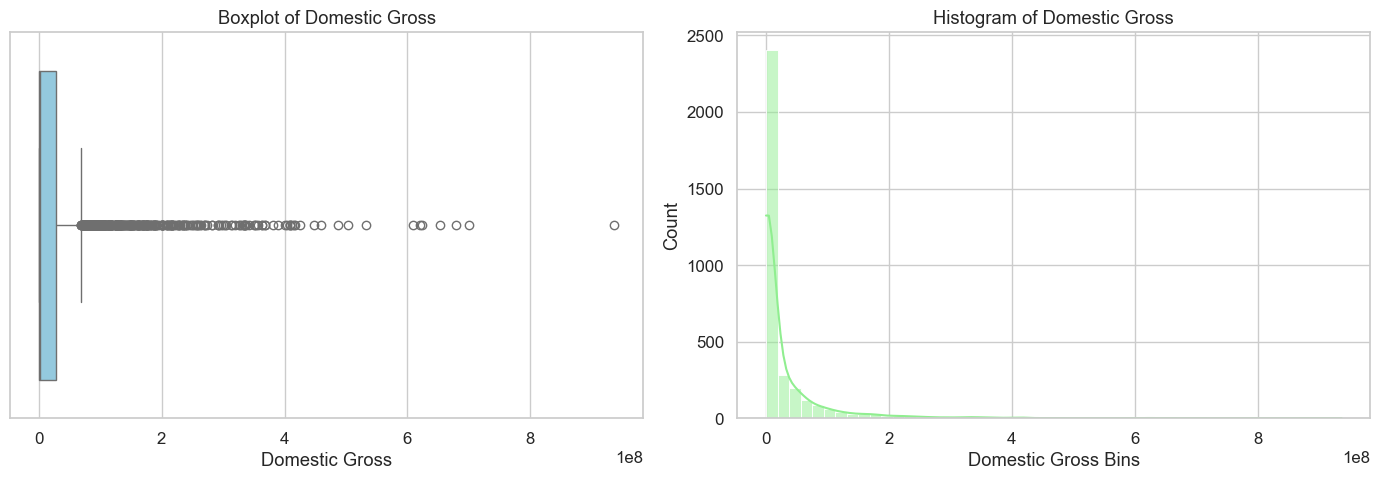

In [792]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='domestic_gross', ax = axes[0], color = 'skyblue')
axes[0].set_title("Boxplot of Domestic Gross")
axes[0].set_xlabel("Domestic Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'domestic_gross', bins=50, kde=True, ax = axes[1], color = 'lightgreen')
axes[1].set_title("Histogram of Domestic Gross")
axes[1].set_xlabel("Domestic Gross Bins")
plt.tight_layout()
plt.show()

#### 'foreign_gross' Column

In [793]:
# Preview rows with nulls in foreign_gross
gross_df.loc[gross_df['foreign_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [794]:
# Inspect unique values in foreign_gross
gross_df.loc[~gross_df['foreign_gross'].astype(str).str.replace(',', '').str.isnumeric(), 'foreign_gross'].unique()

array([nan, '1,131.6', '1,019.4', '1,163.0', '1,010.0', '1,369.5'],
      dtype=object)

In [795]:
# Imputation strategy:

# Coerce to numeric
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Impute median
median_foreign_gross = gross_df['foreign_gross'].median()
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(median_foreign_gross)

# Preview changes
print("Null Values after imputation:", gross_df['foreign_gross'].isna().sum())

Null Values after imputation: 0


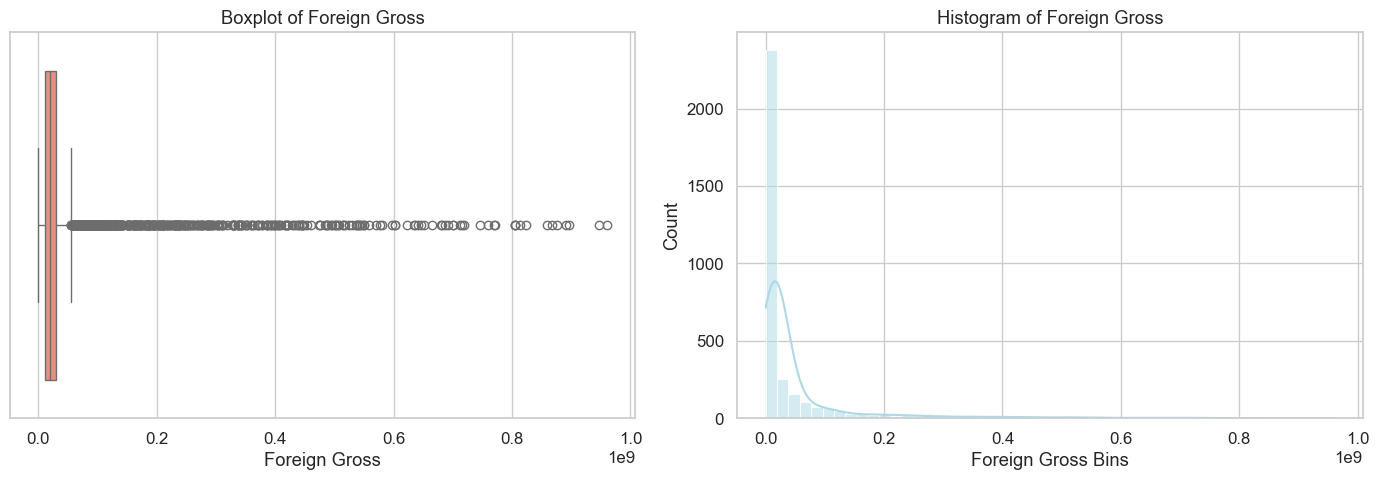

In [796]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='foreign_gross', ax = axes[0], color = 'salmon')
axes[0].set_title("Boxplot of Foreign Gross")
axes[0].set_xlabel("Foreign Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'foreign_gross', bins = 50, kde = True, ax = axes[1], color = 'lightblue')
axes[1].set_title("Histogram of Foreign Gross")
axes[1].set_xlabel("Foreign Gross Bins")
plt.tight_layout()
plt.show()

### OTLIER HANDLING IN GROSS DATASET

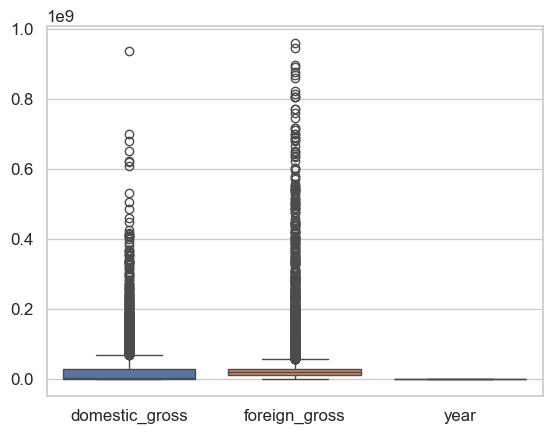

In [797]:
sns.boxplot(gross_df);

#### Comment on Outliers

> The boxplots for both **domestic** and **foreign gross** clearly reveal the presence of extreme outliers - films that have earned substantially more than the majority. In the movie industry, these are typically blockbuster titles, franchise installments, or globally viral releases with massive marketing budgets and wide theatrical distribution. These high-grossing films, while statistically extreme, represent genuine and meaningful data points.
>
> **Removing these outliers would strip away the very success stories we aim to emulate**. Therefore, we will **retain the outliers** in our analysis to ensure we capture the full spectrum of market performance and derive actionable insights from the most profitable examples.

### ROTTEN TOMATOES MOVIE INFORMATION DATASET

In [798]:
null_counts = rt_movies_df.isna().sum()
null_percentages = (null_counts / len(rt_movies_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

              Null Count  Null Percentage (%)
id                     0                 0.00
synopsis              62                 3.97
rating                 3                 0.19
genre                  8                 0.51
director             199                12.76
writer               449                28.78
theater_date         359                23.01
dvd_date             359                23.01
currency            1220                78.21
box_office          1220                78.21
runtime               30                 1.92
studio              1066                68.33


In [799]:
rt_movies_df.loc[rt_movies_df['genre'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,289,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95 minutes,NaN
250,327,"When a new robot, Raymond, defeats the three h...",NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 minutes,NaN
658,843,Miners want to drill for billions of dollars w...,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 minutes,NaN
1082,1393,Steven Seagal plays an expert sniper on a spec...,R,NaN,Fred Olen Ray,Fred Olen Ray,NaN,NaN,NaN,NaN,84 minutes,NaN
1342,1736,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [800]:
rt_movies_df.loc[rt_movies_df['rating'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [801]:
rt_movies_df.loc[rt_movies_df['director'].isna()].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
12,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
20,27,NaN,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [802]:
# Drop useless columns
rt_movies_df = rt_movies_df.drop(columns = [
    "studio",
    "dvd_date",
    "currency",
    "synopsis",
])

rt_movies_df = rt_movies_df.rename(columns = {"rating": "maturity_rating"})

# Drop useless rows
rt_movies_df = rt_movies_df.dropna(subset = ["maturity_rating", "genre"])

# Fill remaining categorical columns with 'unknows'
cat_cols = rt_movies_df.select_dtypes(include = ['object']).columns

for col in cat_cols:
   rt_movies_df[col].fillna('Unknown', inplace = True)

# Preview changes
rt_movies_df.isna().sum()

id                 0
maturity_rating    0
genre              0
director           0
writer             0
theater_date       0
box_office         0
runtime            0
dtype: int64

### MERGED IMDB DATASET

In [803]:
# Get null values percentage to guide on imputation
null_counts = movies_df.isna().sum()
null_percentages = (null_counts / len(movies_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                 Null Count  Null Percentage (%)
movie_id                  0                 0.00
primary_title             0                 0.00
original_title            0                 0.00
start_year                0                 0.00
runtime_minutes        7620                10.32
genres                  804                 1.09
averagerating             0                 0.00
numvotes                  0                 0.00


In [804]:
# Impute missing values in runtime_minutes with median because it is more statistically sound
median_runtime = movies_df['runtime_minutes'].median()
movies_df['runtime_minutes'] = movies_df['runtime_minutes'].fillna(median_runtime)

# Drop null values in 'genres'
movies_df = movies_df.dropna(subset = ['genres'])

# Preview changes
print("Missing Values after imputation:\n", movies_df.isna().sum())

# Check new shape
print(f"\nThe dataset now contains {movies_df.shape[0]} rows and {movies_df.shape[1]} columns")

Missing Values after imputation:
 movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

The dataset now contains 73052 rows and 8 columns


#### OUTLIER HANDLING FOR MERGED IMDB DATASET

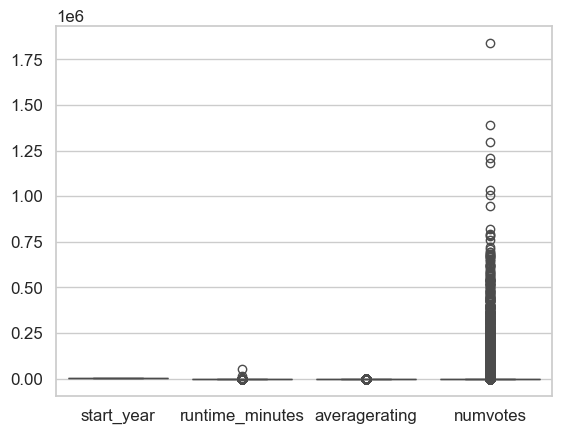

In [805]:
sns.boxplot(movies_df);

### Outlier Commentary

The boxplot reveals clear outliers across multiple numeric columns:

- **runtime_minutes**: Several films significantly exceed the typical range, likely due to special formats (e.g director’s cuts, miniseries logged as films) or data entry errors. These extreme values are sparse but can skew distribution-based analyses like mean runtime or standard deviation.

- **numvotes**: This variable exhibits extreme right-skewness, with a small subset of movies receiving disproportionately high votes - likely blockbusters or cult classics. These outliers are *genuine signals*, not noise, and provide valuable insight into popularity dynamics. However, log-transforming or binning may be helpful if modeling or clustering is later considered.

- **averagerating** and **start_year**: Outliers here are less severe. A few ratings may hit extreme values (e.g unusually low or high), but IMDb caps the rating scale, so distortion is limited. For start_year, occasional anomalies (e.g pre-1900 entries or far-future entries) may be metadata quirks or special historical/fictional content.

**Takeaway**: Most outliers are *contextual* - they often carry meaning rather than being simple anomalies. Thus, should not be dropped blindly. Instead, they offer rich angles for narrative exploration, especially when highlighting patterns in niche genres, cult films, or legacy cinema.

### HANDLING DUPLICATES 
#### 1. TMDB MOVIES

In [806]:
print("Duplicates before imputation:", tmdb_df.duplicated().sum())

tmdb_df = tmdb_df.drop_duplicates()
print("\nDuplicates after imputation:", tmdb_df.duplicated().sum())

Duplicates before imputation: 1020

Duplicates after imputation: 0


### HANDLING CATEGORICAL VARIABLES

#### BUDGET DATASET

In [807]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [808]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_clean:
    budget_df[col] = (
        budget_df[col]
        .str.replace(r'[\$,]', '', regex = True) 
        .astype(float)                          
    )

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [809]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


### GROSS DATASET

In [810]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## EXPLORATORY DATA ANALYSIS (EDA)

This section is dedicated to uncovering the underlying patterns, structures, and quirks within our movie datasets. By dissecting the data through visual and statistical lenses, we aim to understand how key features behave individually and in relation to one another.

We’ll kick things off with a time series analysis to explore how movie trends have evolved over time. After that, we’ll move into univariate(single-variable)distributions, bivariate (two-variable) relationships, and multivariate (multiple-variable) interactions to reveal deeper insights and correlations.

The objective here is clarity: what’s happening in the data, when it happens, and why it might matter.

### 1. TIME SERIES ANALYSIS
Movies live and die by release timing - trends shift, markets evolve, and box office behavior often hinges on when a film hits theaters. To tap into this temporal dynamic, we begin by converting all relevant date columns to proper datetime format. This enables powerful time-based operations: resampling, trend detection, seasonal decomposition, and more.

In this section, we:

- Convert all date-related columns to datetime objects

- Inspect temporal coverage and granularity

- Visualize key metrics over time (e.g number of movies released, budget trends, gross revenue dynamics)

- Identify long-term patterns, spikes, or declines tied to specific periods (e.g pre/post-pandemic, summer releases)

- Let’s bring time into the frame - because in film, timing is everything.

### 1. BUDGET DATASET

In [811]:
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors = 'coerce')

# Extract relevant date components
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df['release_month'] = budget_df['release_date'].dt.month
budget_df['release_weekday'] = budget_df['release_date'].dt.day_name()
budget_df['release_quarter'] = budget_df['release_date'].dt.quarter

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4


In [812]:
# Prepare year data and trend
# budget_df['release_year'] = pd.to_datetime(budget_df['release_date'], errors='coerce').dt.year
release_trend = budget_df.groupby('release_year').size().reset_index(name = 'movie_count')

# Decade summary
release_trend['decade'] = release_trend['release_year'].apply(
    lambda x: f"{(x//10)*10}–{(x//10)*10 + 9}"
)

decade_summary = (
    release_trend.groupby('decade')['movie_count']
    .sum()
    .reset_index()
    .assign(decade_start = lambda df: df['decade'].str.extract(r'(\d{4})').astype(int))
    .sort_values('decade_start')
    .drop(columns = 'decade_start')
)

print("Movie Releases per Decade:\n")
print(decade_summary.to_string(index = False))

# Plot yearly trend
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = release_trend['release_year'],
    y = release_trend['movie_count'],
    mode = 'lines+markers',
    marker = dict(size = 9, color = 'crimson', symbol = 'star'),
    line = dict(color = 'orange', width = 4),
    name = 'Releases'
))

fig.update_layout(
    title = dict(
        text = "Movies Releases Over The Years",
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 22, color = 'black', family = 'Comic Sans MS')
    ),

    xaxis = dict(
        title = 'Year',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'black',
        zeroline = False
    ),

    yaxis = dict(
        title = 'Number of Movies',
        showgrid = True,
        gridcolor = 'lightgrey',
        linecolor = 'black',
        zeroline = False
    ),

    plot_bgcolor = '#fffbe6', 
    paper_bgcolor = '#fffbe6',
    font = dict(color = 'black', family = 'Verdana'),
    hovermode = 'x unified',
    margin = dict(l = 60, r = 40, t = 80, b = 60)
)

fig.show()

Movie Releases per Decade:

   decade  movie_count
1910–1919            3
1920–1929            5
1930–1939           16
1940–1949           24
1950–1959           40
1960–1969           72
1970–1979          111
1980–1989          301
1990–1999          823
2000–2009         2193
2010–2019         2191
2020–2029            3


### 2. UNIVARIATE ANALYSIS

Univariate analysis helps us understand the distribution, central tendency, and spread of individual variables in isolation. In this section, we’ll explore key numerical and categorical features, such as production budgets, revenues, genres, and runtimes, to detect skewness, outliers, and potential data quality issues.

This step lays the foundation for more complex relationships by first mastering each variable on its own.

budget_bin
<25M        3452
25–50M      1122
50–75M       536
75–100M      266
100–150M     211
150–200M     132
Name: count, dtype: int64


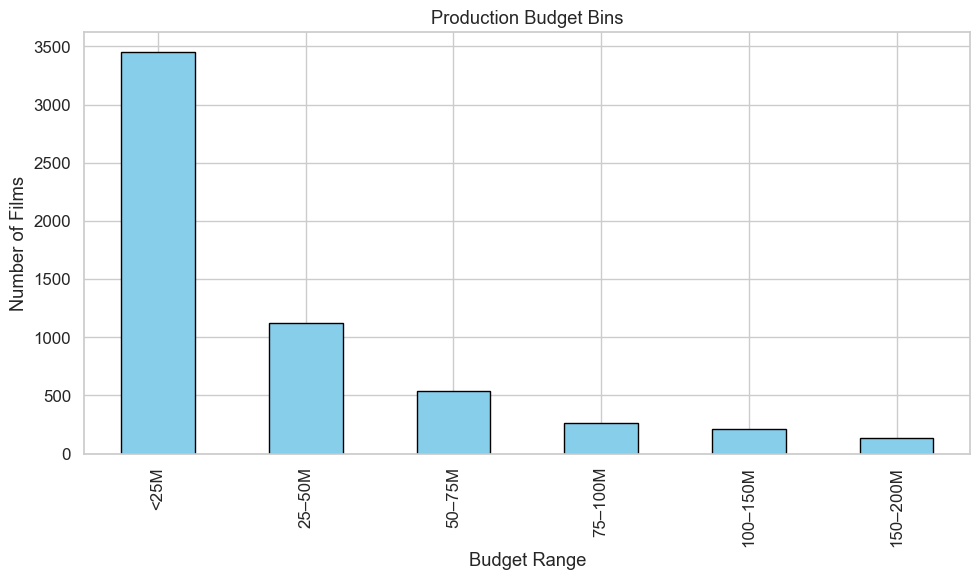

In [813]:
# Define bins and labels
bins = [0, 25_000_000, 50_000_000, 75_000_000, 100_000_000, 150_000_000, 200_000_000]
labels = ['<25M', '25–50M', '50–75M', '75–100M', '100–150M', '150–200M']

# Create bin column
budget_df['budget_bin'] = pd.cut(budget_df['production_budget'], bins=bins, labels=labels, right=False)

# Count per bin
bin_counts = budget_df['budget_bin'].value_counts().sort_index()
print(bin_counts)

# Plot
plt.figure(figsize=(10, 6))  # ✅ Correct way to set size
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Production Budget Bins')
plt.xlabel('Budget Range')
plt.ylabel('Number of Films')
plt.tight_layout()
plt.show()


worldwide_bin
<50M        3557
50–100M      811
100–200M     667
200–500M     548
500M–1B      161
>1B           34
Name: count, dtype: int64


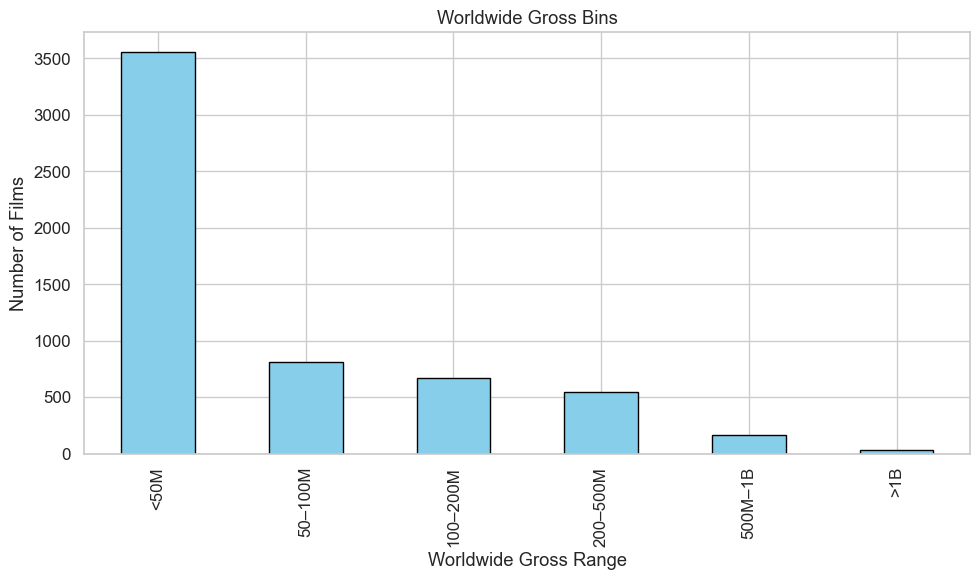

In [814]:
# Clean (if not already done)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Adjusted bins based on range
bins = [0, 50_000_000, 100_000_000, 200_000_000, 500_000_000, 1_000_000_000, 2_000_000_000]
labels = ['<50M', '50–100M', '100–200M', '200–500M', '500M–1B', '>1B']

# Binning
budget_df['worldwide_bin'] = pd.cut(budget_df['worldwide_gross'], bins=bins, labels=labels, right=False)

# Count and plot
bin_counts = budget_df['worldwide_bin'].value_counts().sort_index()
print(bin_counts)

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Worldwide Gross Bins')
plt.xlabel('Worldwide Gross Range')
plt.ylabel('Number of Films')
plt.tight_layout()
plt.show()


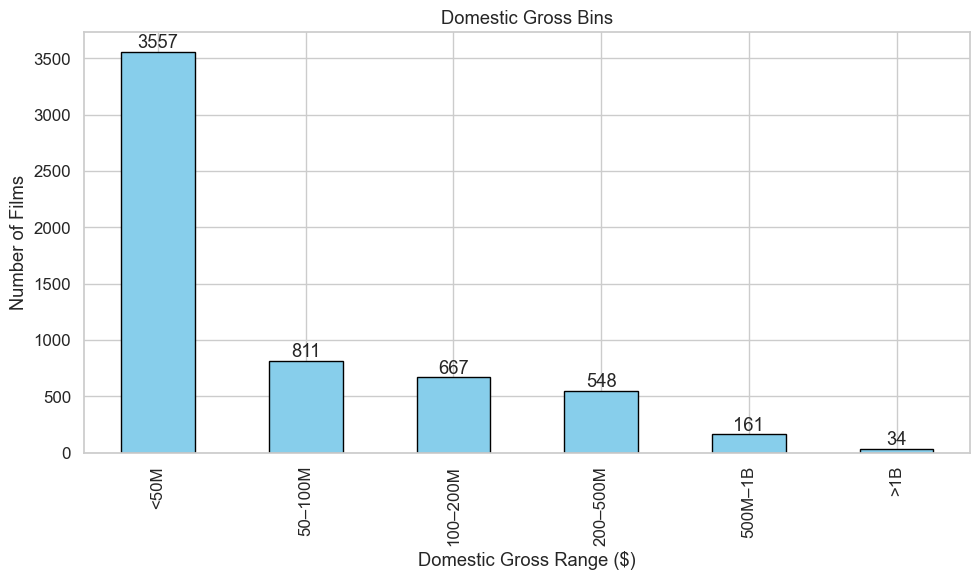

In [815]:
# Plot with annotations
ax = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))
plt.title('Domestic Gross Bins')
plt.xlabel('Domestic Gross Range ($)')
plt.ylabel('Number of Films')

# Add count labels above bars
for i, count in enumerate(bin_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Top 15 Genres by Number of Films:
Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Name: count, dtype: int64


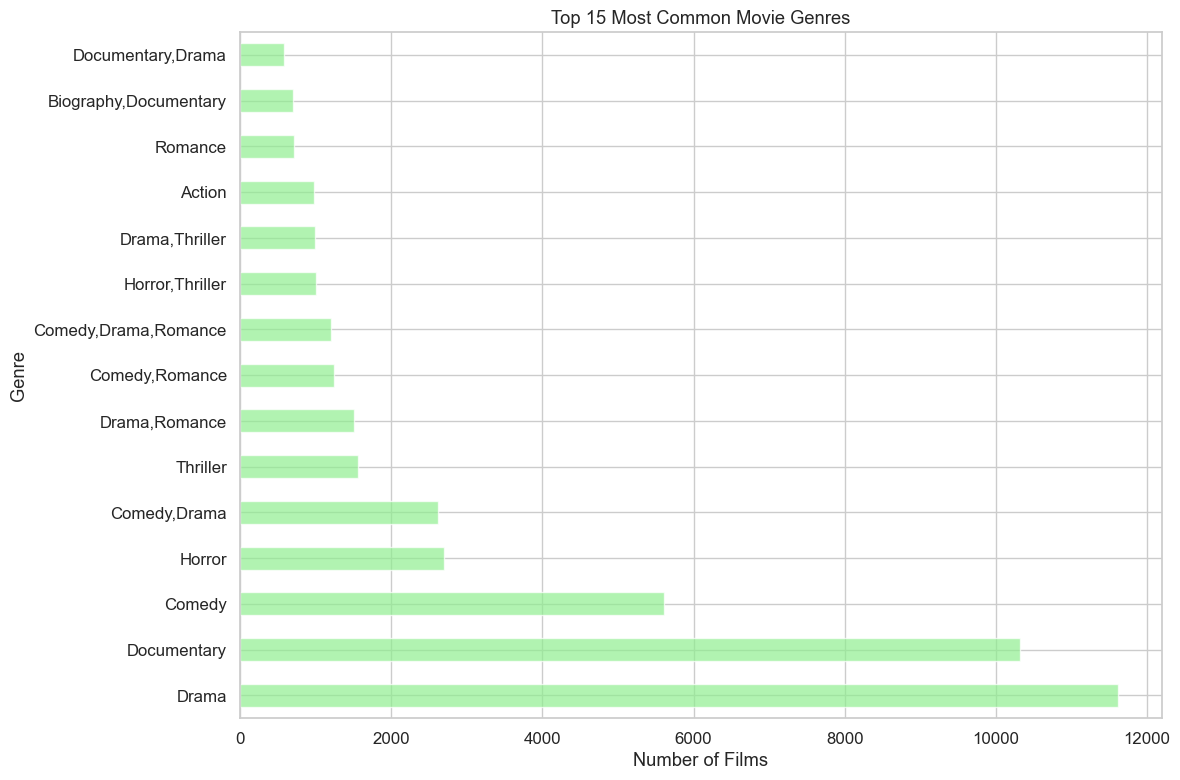

In [816]:
# Genre Distribution Analysis
# First, let's split the pipe-delimited genres and count individual genres
all_genres = []
for genre_string in movies_df['genres'].dropna():
    genres = genre_string.split('|')
    all_genres.extend(genres)

# Create a DataFrame for genre counts
genre_counts = pd.Series(all_genres).value_counts().head(15)
print("Top 15 Genres by Number of Films:")
print(genre_counts)

# Visualization
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='barh', color='lightgreen', alpha=0.7)
plt.title('Top 15 Most Common Movie Genres')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

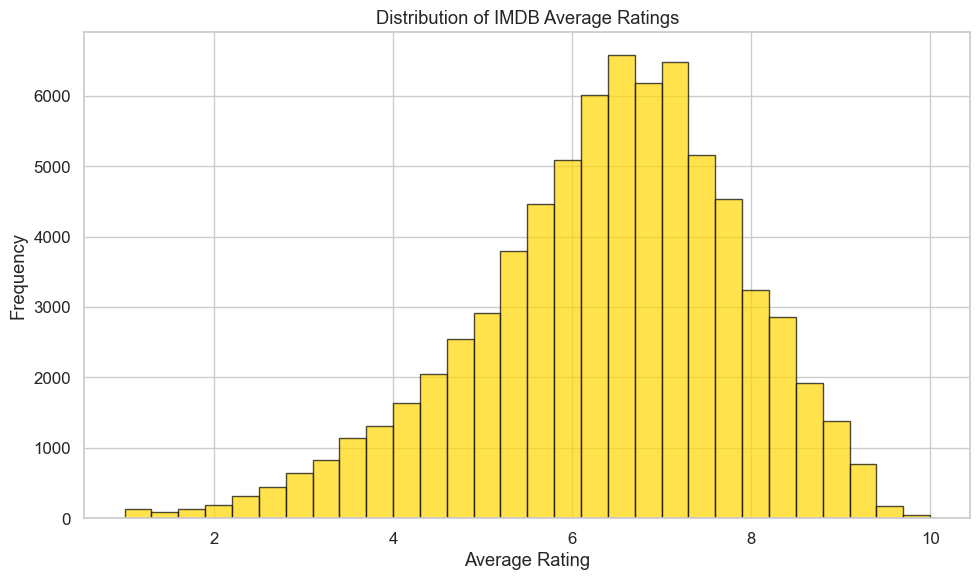

IMDB Average Ratings Summary:
count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


In [817]:
# IMDB Average Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(movies_df['averagerating'], bins=30, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of IMDB Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics
print("IMDB Average Ratings Summary:")
print(movies_df['averagerating'].describe())

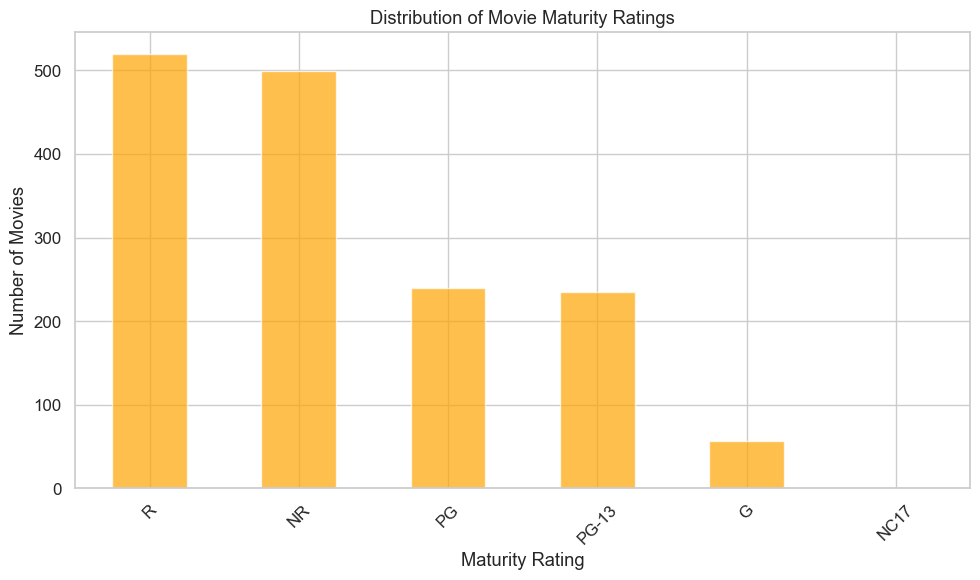

Maturity Rating Distribution:
maturity_rating
R        520
NR       499
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64


In [818]:
# Maturity Rating Distribution (from Rotten Tomatoes data)
plt.figure(figsize=(10, 6))
rating_counts = rt_movies_df['maturity_rating'].value_counts()
rating_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribution of Movie Maturity Ratings')
plt.xlabel('Maturity Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
print("Maturity Rating Distribution:")
print(rating_counts)

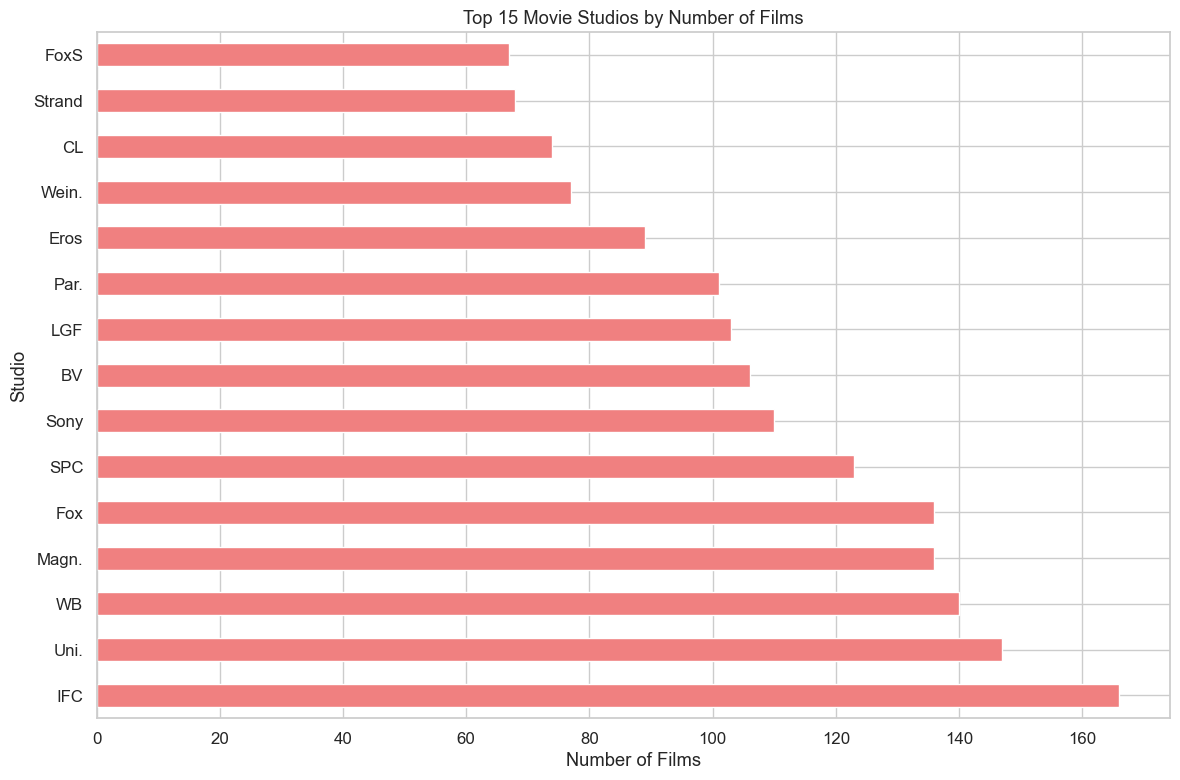

Top 10 Studios:
studio
IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: count, dtype: int64


In [819]:
# Studio Distribution (from Gross data)
plt.figure(figsize=(12, 8))
studio_counts = gross_df['studio'].value_counts().head(15)
studio_counts.plot(kind='barh', color='lightcoral')
plt.title('Top 15 Movie Studios by Number of Films')
plt.xlabel('Number of Films')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

# Summary
print("Top 10 Studios:")
print(studio_counts.head(10))

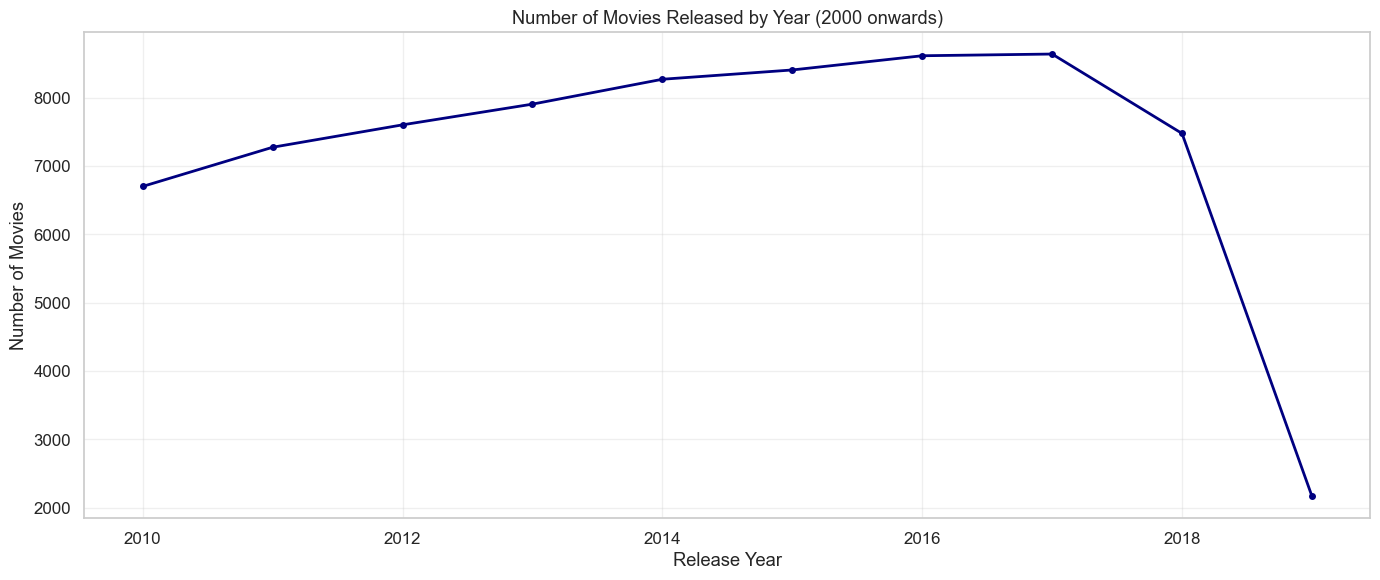

Movies by Recent Years (2015-2020):
start_year
2014    8269
2015    8405
2016    8613
2017    8638
2018    7476
2019    2169
Name: count, dtype: int64


In [820]:
# Release Year Distribution (from IMDB data)
plt.figure(figsize=(14, 6))
year_counts = movies_df['start_year'].value_counts().sort_index()

# Filter to recent years for better visualization
recent_years = year_counts[year_counts.index >= 2000]
recent_years.plot(kind='line', marker='o', color='navy', linewidth=2, markersize=4)
plt.title('Number of Movies Released by Year (2000 onwards)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary
print("Movies by Recent Years (2015-2020):")
print(recent_years.tail(6))

### BIVARIATE ANALYSIS
#### 1.WHICH MOVIE GENRES ARE CONSISTENTLY EARNING THE HIGHEST ROI? 

In [821]:
# Worked with the gross_df and compared budget for production with gross income
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter,budget_bin,worldwide_bin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2,NaN,>1B
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2,NaN,100–200M
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2,NaN,>1B
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4,NaN,>1B


In [822]:
# Calculate ROI for each movie
budget_df['roi'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) /budget_df['production_budget']
budget_df['roi']

0         5.532577
1         1.546673
2        -0.572108
3         3.243841
4         3.153696
           ...    
5777     -1.000000
5778     39.082500
5779     -0.732400
5780     -1.000000
5781    163.582727
Name: roi, Length: 5782, dtype: float64

In [823]:
# confirm new column
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter,budget_bin,worldwide_bin,roi
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4,NaN,NaN,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2,NaN,>1B,1.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2,NaN,100–200M,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2,NaN,>1B,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4,NaN,>1B,3.153696


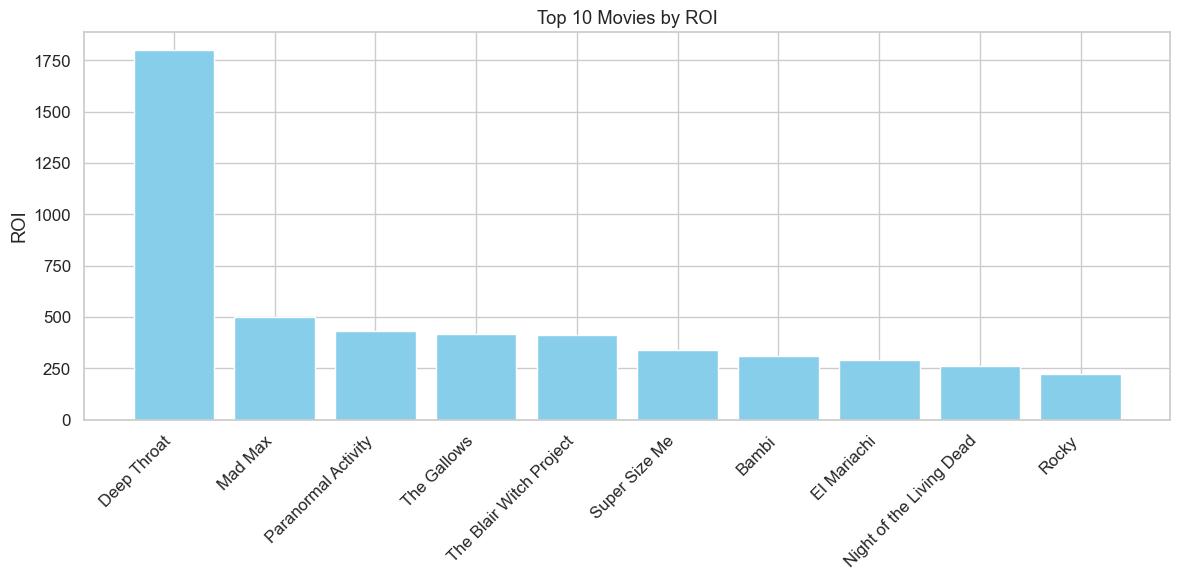

In [824]:
#plot them
top_movies = budget_df.sort_values('roi', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_movies['movie'], top_movies['roi'], color='skyblue')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('ROI')
plt.title('Top 10 Movies by ROI')
plt.tight_layout()
plt.show()

### OBSERVATIONS
#### . 'Deep Throat' has surpassed all other movies with the ROI,second highest being 'Mad max'
#### . Movies from 'Paranormal Activity' down to 'The Night of the living dead'have relatively similar ROI's

### 2. HOW DO RELEASE DATES AFFECT PERFORMANCE?

In [825]:
rt_movies_df.head()

,id,maturity_rating,genre,director,writer,theater_date,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",Unknown,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",Unknown,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",Unknown,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown,Unknown,200 minutes


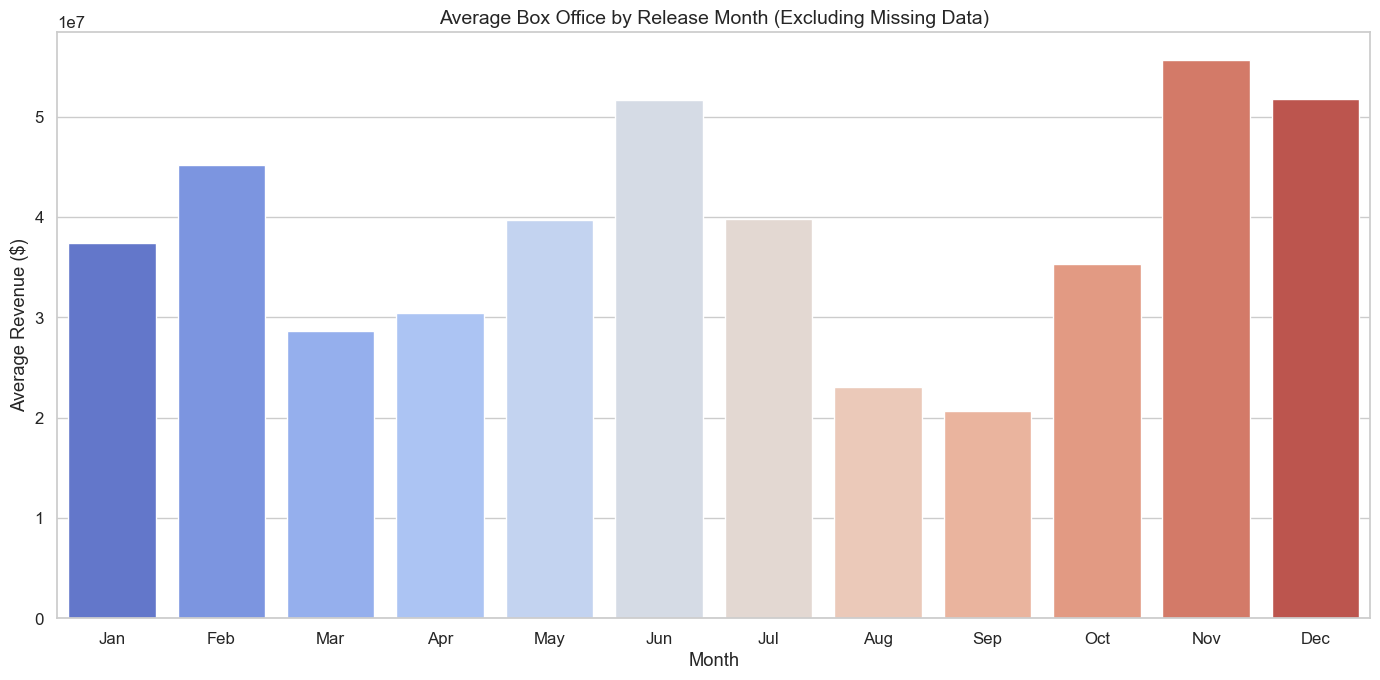

In [826]:
# 1. Convert theater dates and handle errors
rt_movies_df['theater_date'] = pd.to_datetime(rt_movies_df['theater_date'], errors='coerce')

# 2. Clean box office data - handle 'Unknown' and empty strings
rt_movies_df['box_office'] = (
    rt_movies_df['box_office']
    .replace('Unknown', pd.NA)  
    .astype(str) 
    .str.replace(r'[^\d.]', '', regex=True)  
    .replace('', pd.NA))

# 3. Convert to numeric and drop NA values
rt_movies_df['box_office'] = pd.to_numeric(rt_movies_df['box_office'], errors='coerce')
plot_data = rt_movies_df.dropna(subset=['theater_date', 'box_office']).copy()

# 4. Create the plot with proper filtering
plt.figure(figsize=(14, 7))

# 5. Bar plot by month
plot_data['month'] = plot_data['theater_date'].dt.month
monthly_avg = plot_data.groupby('month')['box_office'].mean()

sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Box Office by Release Month (Excluding Missing Data)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Revenue ($)')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                  'Jul','Aug','Sep','Oct','Nov','Dec'])

plt.tight_layout()
plt.show()

### OBSERVATIONS
#### . Shows highest ROI is during holiday seasons (around November - December), with december showing the highest income rate
#### . significant peaks during summer(around June - August)
#### . Lowest performance is in early spring and late fall i.e March,April,October,November


### 3. DO LONGER OR SHORTER MOVIES GENERATE MORE OR LESS INCOME?

#### So we plotted box_office against Runtime to analyze how movie runtime affects financial performance 

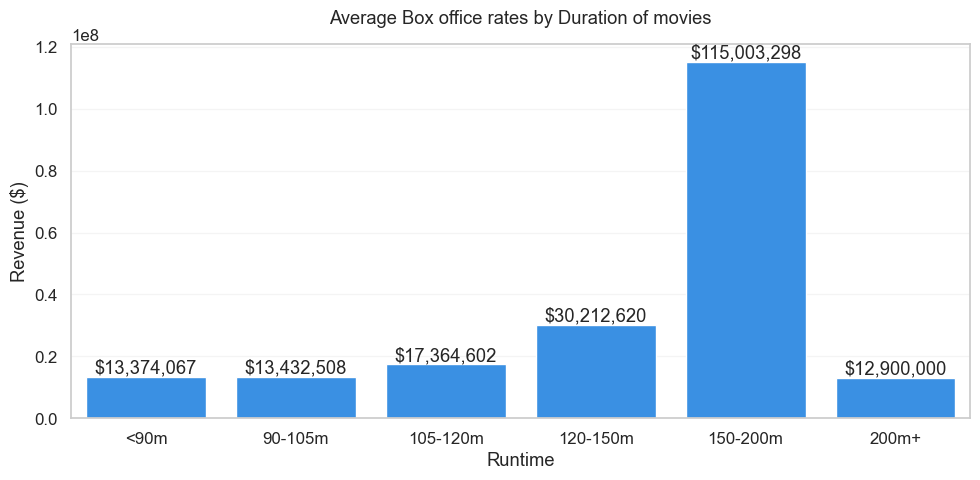

In [827]:
# 1. Convert runtime to numeric minutes\
df = rt_movies_df.copy()
df['runtime_min'] = df['runtime'].str.extract('(\d+)').astype(float)

# Clean box office data
def clean_box_office(value):
    if pd.isna(value) or value == 'Unknown':
        return None
    value_str = str(value).strip()
    cleaned = ''.join(c for c in value_str if c.isdigit() or c == '.')
    return float(cleaned) if cleaned else None

# Apply the cleaning function
rt_movies_df['box_office'] = rt_movies_df['box_office'].apply(clean_box_office)

# Set up runtime categories
bins = [0, 90, 105, 120, 150, 200, 300]
labels = ['<90m', '90-105m', '105-120m', 
               '120-150m', '150-200m', '200m+']

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df.dropna(),
                x=pd.cut(df['runtime_min'], bins=bins, labels=labels),
                y='box_office',
                estimator=np.median,
                errorbar=None,
                color='dodgerblue')

plt.title('Average Box office rates by Duration of movies', pad=15)
plt.xlabel('Runtime')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', alpha=0.2)

# Add value labels
for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'${bar.get_height():,.0f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

### OBSERVATIONS
#### . Movies with runtimes between 150-200 minutes have the highest average box office revue
#### . On the other hand, movies with more than 200 minutes have the least box office revenue
#### . The average revenue increases significantlly for categories between <90 min up to 150-200 min, showing a positive correlation of the same

### 4. WHAT IS THE DISTRIBUTION OF FILMS RELEASED BY EACH STUDIO?

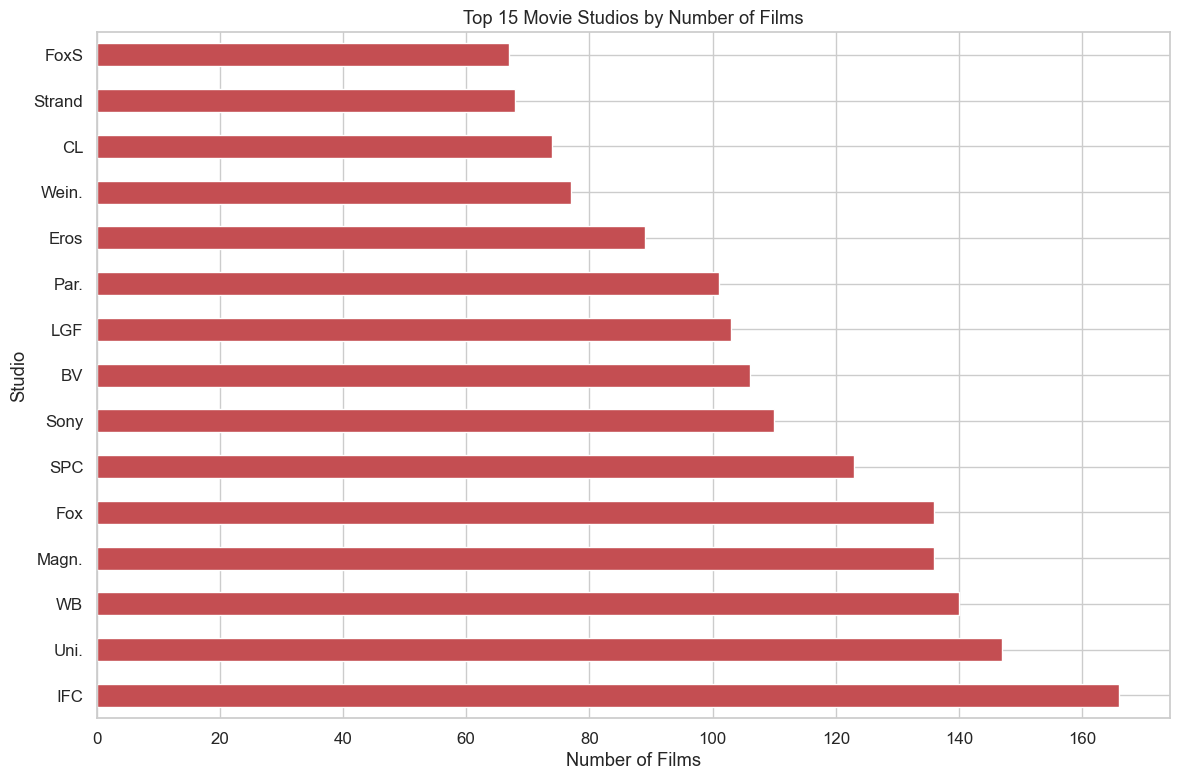

Top 10 Studios:
studio
IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: count, dtype: int64


In [828]:
#  Studio Distribution (from Gross data) against number of films
plt.figure(figsize=(12, 8))
studio_counts = gross_df['studio'].value_counts().head(15)
studio_counts.plot(kind='barh', color='r')
plt.title('Top 15 Movie Studios by Number of Films')
plt.xlabel('Number of Films')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

# Summary
print("Top 10 Studios:")
print(studio_counts.head(10))

### OBSERVATIONS
#### . 'IFC' studios has the highest number of films, with 'UNI' & 'WB' coming in close
#### . 'FOXs' studios has the least number of films

### 5. HOW DOES MOVIE BUDGET VARY OVER THE YEARS?

In [829]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter,budget_bin,worldwide_bin,roi
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4,NaN,NaN,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2,NaN,>1B,1.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2,NaN,100–200M,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2,NaN,>1B,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4,NaN,>1B,3.153696


In [830]:
# convert release_date to date time
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')

# extract the years
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_weekday,release_quarter,budget_bin,worldwide_bin,roi
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,Friday,4,NaN,NaN,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,Friday,2,NaN,>1B,1.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,Friday,2,NaN,100–200M,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,Friday,2,NaN,>1B,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,Friday,4,NaN,>1B,3.153696


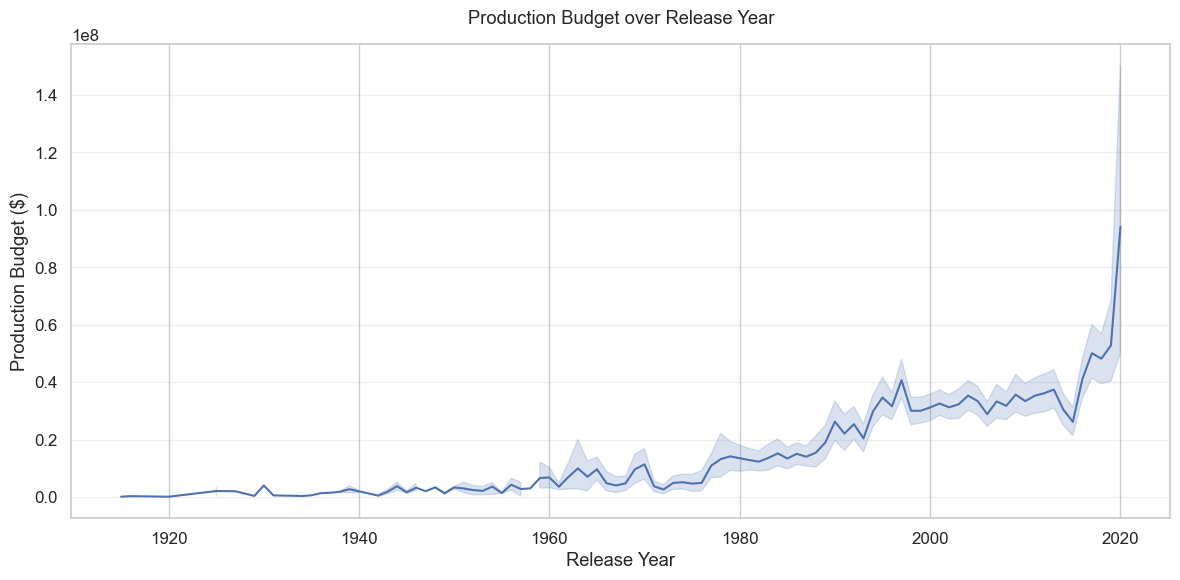

In [831]:
# convert infinite values to NAN
budget_df['production_budget'] = budget_df['production_budget'].replace([np.inf, -np.inf], np.nan)

# plot production budget vs release year
plt.figure(figsize=(12, 6))
sns.lineplot(data=budget_df, x='release_year', y='production_budget')

plt.title('Production Budget over Release Year', pad=15)
plt.xlabel('Release Year')
plt.ylabel('Production Budget ($)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### OBSERVATIONS
#### . The average production budget remains very low and relatively stable in the early years(1910s-1950s)
#### . Starting around 1960s, there's an upward trend that continues to the 1970s and 80s 
#### . There's an accelerated growth from 1990s peaking to 2020
